In [1]:
#importing the necessary libs and packages
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#preparing the data to our needs before importing
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:
data = []
conversation = '.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date      Time Author  \
23417 2022-02-03   5:09 pm   Aadi   
23418 2022-03-03   6:00 pm   None   
23419 2022-03-03   6:34 pm  Mukul   
23420 2022-03-03   6:34 pm  Mukul   
23421 2022-03-03   6:43 pm  Akash   
23422 2022-05-03  11:57 am  Mukul   
23423 2022-05-03  12:15 pm   Aadi   
23424 2022-05-03   3:21 pm    Raj   
23425 2022-05-03   4:05 pm   Aadi   
23426 2022-08-03   9:45 am  Mukul   
23427 2022-08-03   9:46 am    Raj   
23428 2022-08-03  11:28 am   Aadi   
23429 2022-08-03   2:46 pm  Mukul   
23430 2022-08-03   3:33 pm   hav    
23431 2022-08-03   3:39 pm    Raj   
23432 2022-03-18   9:33 pm  Mukul   
23433 2022-03-18   9:33 pm  Mukul   
23434 2022-03-28   2:29 pm   Aadi   
23435 2022-03-28   2:34 pm   hav    
23436 2022-03-28   2:34 pm   Aadi   

                                                 Message  
23417                                                 😂😂  
23418  Akash: https://www.you be.com/watch?v=1d6AtUdd z0  
23419                              Prema re m

In [5]:
total_messages = df.shape[0]
print(total_messages)

23437


In [6]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

1290


In [7]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

9545


In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between friends")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between friends
Total Messages:  23437
Number of Media Shared:  1290
Number of Emojis Shared 9545
Number of Links Shared 80


In [9]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Aadi', 'Aman', 'Raj', 'Mukul', 'Amit', 'Harneet', 'Akash', 'Yashwant',
 'Arbaaz', 'Akhil', 'Bhavik', 'Sachin', 'Tarun', 'Roshan']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  print()  

Stats of Aadi -
Messages Sent 4111
Average Words per message 5.711505716370713
Media Messages Sent 244
Emojis Sent 3920
Links Sent 1

Stats of Aman -
Messages Sent 1285
Average Words per message 5.719066147859922
Media Messages Sent 52
Emojis Sent 565
Links Sent 0

Stats of Raj -
Messages Sent 3396
Average Words per message 7.803592461719671
Media Messages Sent 241
Emojis Sent 203
Links Sent 0

Stats of Mukul -
Messages Sent 6354
Average Words per message 6.806893295561851
Media Messages Sent 257
Emojis Sent 1119
Links Sent 0

Stats of Amit -
Messages Sent 446
Average Words per message 4.692825112107624
Media Messages Sent 19
Emojis Sent 85
Links Sent 0

Stats of Harneet -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Akash -
Messages Sent 1816
Average Words per message 4.549559471365638
Media Messages Sent 153
Emojis Sent 979
Links Sent 0

Stats of Yashwant -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0


C:\Users\adity\AppData\Local\Temp/ipykernel_15652/1917950645.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [10]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 3782)
('🤣', 1185)
('😅', 245)
('🙂', 185)
('😁', 177)
('😭', 177)
('😐', 165)
('🙄', 152)
('😶', 136)
('🥲', 135)
('🥺', 129)
('😆', 128)
('🔥', 106)
('🤷', 101)
('🥳', 98)
('👍', 98)
('😌', 96)
('👁️', 95)
('😑', 92)
('✨', 84)
('👀', 82)
('🤦\u200d♀️', 80)
('😬', 74)
('🙏', 71)
('👏🏼', 71)
('😳', 68)
('😏', 67)
('🌝', 59)
('👏', 55)
('😔', 53)
('🤦🏻\u200d♂️', 53)
('😊', 47)
('😘', 45)
('♥️', 38)
('😎', 36)
('😍', 36)
('🙏🏼', 36)
('👍🏼', 34)
('💯', 33)
('🤤', 32)
('😞', 30)
('😒', 27)
('🎉', 26)
('🤔', 25)
('😡', 24)
('😴', 24)
('🤢', 24)
('😉', 23)
('☹️', 23)
('🎂', 23)
('😝', 22)
('🧐', 22)
('🥰', 21)
('😜', 20)
('🥱', 20)
('🤨', 19)
('👄', 19)
('❤️', 19)
('🌚', 19)
('👍🏻', 18)
('👌', 18)
('😀', 17)
('❣️', 16)
('🤐', 16)
('❤', 16)
('🙃', 16)
('🤦\u200d♂️', 16)
('✌️', 15)
('🤩', 15)
('🤮', 14)
('😱', 13)
('😖', 13)
('🤧', 13)
('😵', 12)
('😄', 12)
('👏🏻', 12)
('😓', 11)
('✌🏼', 11)
('✌🏻', 11)
('😢', 11)
('🤯', 10)
('🤡', 10)
('💪', 10)
('🥵', 10)
('🙆', 9)
('😥', 9)
('🥴', 9)
('😋', 9)
('🙌', 9)
('🤭', 8)
('😤', 8)
('😮', 8)
('💫', 8)
('🤷🏻\u200d♂️', 7)
('💜', 6

There are 536037 words in all the messages.


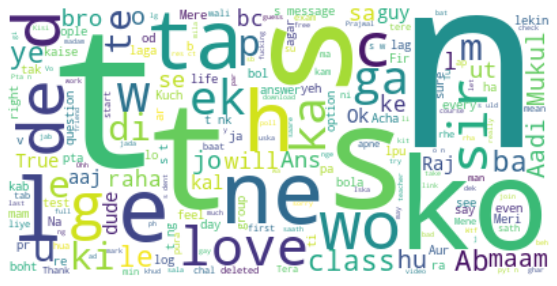

In [11]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Aadi


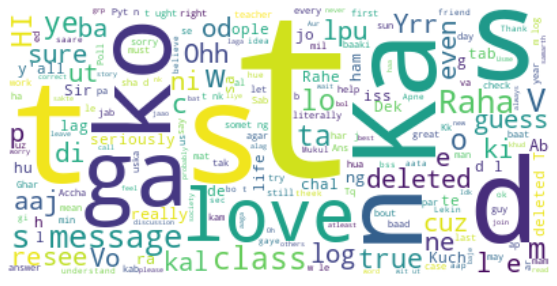

Author name Aman


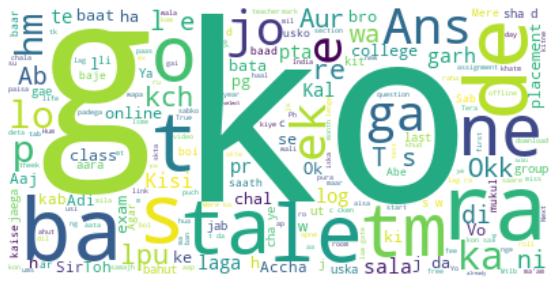

Author name Raj


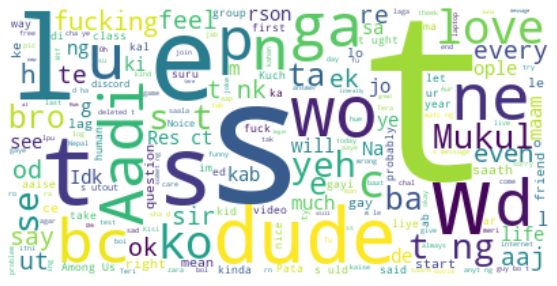

Author name Mukul


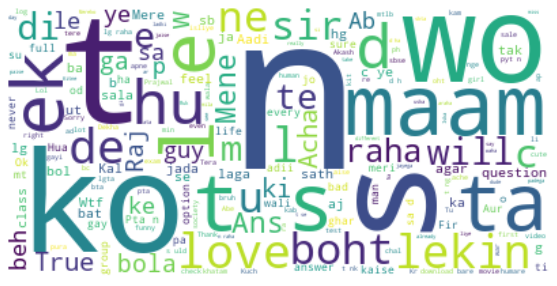

Author name Amit


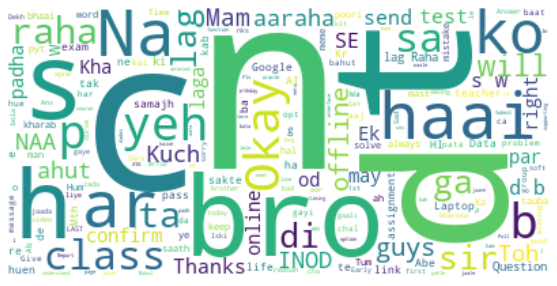

Author name Akash


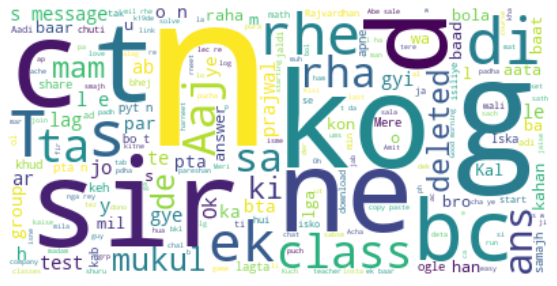

Author name Yashwant


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [12]:
l = ['Aadi', 'Aman', 'Raj', 'Mukul', 'Amit', 'Akash', 'Yashwant',
 'Arbaaz', 'Akhil', 'Bhavik', 'Sachin', 'Tarun', 'Roshan']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()